In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming 'your_dataset.csv' is the name of your dataset file
file_path ='/content/drive/My Drive/Dataset/InSDN_DatasetCSV/Timestamp_modified_concatenated_InSDN_DatasetCSV.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

**Label Name**

In [ ]:
# Strip leading and trailing whitespace from labels
df['Label'] = df['Label'].str.strip()

# Extract unique values in the 'Label' column
original_labels = df['Label'].unique()

# Print the unique labels
for label in original_labels:
    print(label)


U2R
BFA
DDoS
DoS
Probe
Web-Attack
BOTNET
Normal


In [ ]:
# Count occurrences of labels
BFA_count = df[df['Label'] == 'BFA'].shape[0]
U2R_count = df[df['Label'] == 'U2R'].shape[0]
Probe_count = df[df['Label'] == 'Probe'].shape[0]
DDoS_count = df[df['Label'] == 'DDoS'].shape[0]
DoS_count = df[df['Label'] == 'DoS'].shape[0]
Normal_count = df[df['Label'] == 'Normal'].shape[0]
Web_Attack_count = df[df['Label'] == 'Web-Attack'].shape[0]
BOTNET_count = df[df['Label'] == 'BOTNET'].shape[0]

# Display the counts
print('BFA_count:', BFA_count)
print('U2R_count:', U2R_count)
print('Probe_count:', Probe_count)
print('DDoS_count:', DDoS_count)
print('DoS_count:', DoS_count)
print('Normal_count:', Normal_count)
print('Web-Attack_count:', Web_Attack_count)
print('BOTNET_count:', BOTNET_count)

BFA_count: 1405
U2R_count: 17
Probe_count: 98129
DDoS_count: 121942
DoS_count: 53616
Normal_count: 68424
Web-Attack_count: 192
BOTNET_count: 164


**Preprocessing**

In [ ]:
df.head(5)

,Flow ID,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.130-200.175.2.130-38694-4444-6,269709,4,5,48,23,30,0,12.0,14.696938,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,192.168.3.130-200.175.2.130-38693-4444-6,268599,2,3,0,23,0,0,0.0,0.000000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,192.168.3.130-200.175.2.130-3632-33747-6,22194,5,5,53,30,30,0,10.6,14.724130,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
3,192.168.3.130-200.175.2.130-8180-38745-6,9556,4,4,30,30,30,0,7.5,15.000000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,192.168.3.130-200.175.2.130-8180-37217-6,8782,4,4,30,30,30,0,7.5,15.000000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [ ]:
df.shape

(343889, 78)

In [ ]:
df.dtypes

Flow ID             object
Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts      int64
                    ...   
Idle Mean          float64
Idle Std           float64
Idle Max             int64
Idle Min             int64
Label               object
Length: 78, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
from sklearn import preprocessing

# Initialize LabelEncoder
le = preprocessing.LabelEncoder()

# Convert columns to string type
df['Flow ID'] = df['Flow ID'].astype(str)
df['Flow Duration'] = df['Flow Duration'].astype(str)
df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(str)
df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(str)
df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(str)
df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(str)
df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(str)
df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(str)
df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(str)
df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(str)
df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(str)
df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(str)
df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(str)
df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(str)
df['Flow Byts/s'] = df['Flow Byts/s'].astype(str)
df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(str)
df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(str)
df['Flow IAT Std'] = df['Flow IAT Std'].astype(str)
df['Flow IAT Max'] = df['Flow IAT Max'].astype(str)
df['Flow IAT Min'] = df['Flow IAT Min'].astype(str)
df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(str)
df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(str)
df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(str)
df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(str)
df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(str)
df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(str)
df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(str)
df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(str)
df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(str)
df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(str)
df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(str)
df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(str)
df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(str)
df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(str)
df['Fwd Header Len'] = df['Fwd Header Len'].astype(str)
df['Bwd Header Len'] = df['Bwd Header Len'].astype(str)
df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(str)
df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(str)
df['Pkt Len Min'] = df['Pkt Len Min'].astype(str)
df['Pkt Len Max'] = df['Pkt Len Max'].astype(str)
df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(str)
df['Pkt Len Std'] = df['Pkt Len Std'].astype(str)
df['Pkt Len Var'] = df['Pkt Len Var'].astype(str)
df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(str)
df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(str)
df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(str)
df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(str)
df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(str)
df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(str)
df['CWE Flag Count'] = df['CWE Flag Count'].astype(str)
df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(str)
df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(str)
df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(str)
df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(str)
df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(str)
df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(str)
df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(str)
df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(str)
df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(str)
df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(str)
df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(str)
df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(str)
df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(str)
df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(str)
df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(str)
df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(str)
df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(str)
df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(str)
df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(str)
df['Active Mean'] = df['Active Mean'].astype(str)
df['Active Std'] = df['Active Std'].astype(str)
df['Active Max'] = df['Active Max'].astype(str)
df['Active Min'] = df['Active Min'].astype(str)
df['Idle Mean'] = df['Idle Mean'].astype(str)
df['Idle Std'] = df['Idle Std'].astype(str)
df['Idle Max'] = df['Idle Max'].astype(str)
df['Idle Min'] = df['Idle Min'].astype(str)
df['Label'] = df['Label'].astype(str)

# Apply LabelEncoder
df['Flow ID'] = le.fit_transform(df['Flow ID'])
df['Flow Duration'] = le.fit_transform(df['Flow Duration'])
df['Tot Fwd Pkts'] = le.fit_transform(df['Tot Fwd Pkts'])
df['Tot Bwd Pkts'] = le.fit_transform(df['Tot Bwd Pkts'])
df['TotLen Fwd Pkts'] = le.fit_transform(df['TotLen Fwd Pkts'])
df['TotLen Bwd Pkts'] = le.fit_transform(df['TotLen Bwd Pkts'])
df['Fwd Pkt Len Max'] = le.fit_transform(df['Fwd Pkt Len Max'])
df['Fwd Pkt Len Min'] = le.fit_transform(df['Fwd Pkt Len Min'])
df['Fwd Pkt Len Mean'] = le.fit_transform(df['Fwd Pkt Len Mean'])
df['Fwd Pkt Len Std'] = le.fit_transform(df['Fwd Pkt Len Std'])
df['Bwd Pkt Len Max'] = le.fit_transform(df['Bwd Pkt Len Max'])
df['Bwd Pkt Len Min'] = le.fit_transform(df['Bwd Pkt Len Min'])
df['Bwd Pkt Len Mean'] = le.fit_transform(df['Bwd Pkt Len Mean'])
df['Bwd Pkt Len Std'] = le.fit_transform(df['Bwd Pkt Len Std'])
df['Flow Byts/s'] = le.fit_transform(df['Flow Byts/s'])
df['Flow Pkts/s'] = le.fit_transform(df['Flow Pkts/s'])
df['Flow IAT Mean'] = le.fit_transform(df['Flow IAT Mean'])
df['Flow IAT Std'] = le.fit_transform(df['Flow IAT Std'])
df['Flow IAT Max'] = le.fit_transform(df['Flow IAT Max'])
df['Flow IAT Min'] = le.fit_transform(df['Flow IAT Min'])
df['Fwd IAT Tot'] = le.fit_transform(df['Fwd IAT Tot'])
df['Fwd IAT Mean'] = le.fit_transform(df['Fwd IAT Mean'])
df['Fwd IAT Std'] = le.fit_transform(df['Fwd IAT Std'])
df['Fwd IAT Max'] = le.fit_transform(df['Fwd IAT Max'])
df['Fwd IAT Min'] = le.fit_transform(df['Fwd IAT Min'])
df['Bwd IAT Tot'] = le.fit_transform(df['Bwd IAT Tot'])
df['Bwd IAT Mean'] = le.fit_transform(df['Bwd IAT Mean'])
df['Bwd IAT Std'] = le.fit_transform(df['Bwd IAT Std'])
df['Bwd IAT Max'] = le.fit_transform(df['Bwd IAT Max'])
df['Bwd IAT Min'] = le.fit_transform(df['Bwd IAT Min'])
df['Fwd PSH Flags'] = le.fit_transform(df['Fwd PSH Flags'])
df['Bwd PSH Flags'] = le.fit_transform(df['Bwd PSH Flags'])
df['Fwd URG Flags'] = le.fit_transform(df['Fwd URG Flags'])
df['Bwd URG Flags'] = le.fit_transform(df['Bwd URG Flags'])
df['Fwd Header Len'] = le.fit_transform(df['Fwd Header Len'])
df['Bwd Header Len'] = le.fit_transform(df['Bwd Header Len'])
df['Fwd Pkts/s'] = le.fit_transform(df['Fwd Pkts/s'])
df['Bwd Pkts/s'] = le.fit_transform(df['Bwd Pkts/s'])
df['Pkt Len Min'] = le.fit_transform(df['Pkt Len Min'])
df['Pkt Len Max'] = le.fit_transform(df['Pkt Len Max'])
df['Pkt Len Mean'] = le.fit_transform(df['Pkt Len Mean'])
df['Pkt Len Std'] = le.fit_transform(df['Pkt Len Std'])
df['Pkt Len Var'] = le.fit_transform(df['Pkt Len Var'])
df['FIN Flag Cnt'] = le.fit_transform(df['FIN Flag Cnt'])
df['SYN Flag Cnt'] = le.fit_transform(df['SYN Flag Cnt'])
df['RST Flag Cnt'] = le.fit_transform(df['RST Flag Cnt'])
df['PSH Flag Cnt'] = le.fit_transform(df['PSH Flag Cnt'])
df['ACK Flag Cnt'] = le.fit_transform(df['ACK Flag Cnt'])
df['URG Flag Cnt'] = le.fit_transform(df['URG Flag Cnt'])
df['CWE Flag Count'] = le.fit_transform(df['CWE Flag Count'])
df['ECE Flag Cnt'] = le.fit_transform(df['ECE Flag Cnt'])
df['Down/Up Ratio'] = le.fit_transform(df['Down/Up Ratio'])
df['Pkt Size Avg'] = le.fit_transform(df['Pkt Size Avg'])
df['Fwd Seg Size Avg'] = le.fit_transform(df['Fwd Seg Size Avg'])
df['Bwd Seg Size Avg'] = le.fit_transform(df['Bwd Seg Size Avg'])
df['Fwd Byts/b Avg'] = le.fit_transform(df['Fwd Byts/b Avg'])
df['Fwd Pkts/b Avg'] = le.fit_transform(df['Fwd Pkts/b Avg'])
df['Fwd Blk Rate Avg'] = le.fit_transform(df['Fwd Blk Rate Avg'])
df['Bwd Byts/b Avg'] = le.fit_transform(df['Bwd Byts/b Avg'])
df['Bwd Pkts/b Avg'] = le.fit_transform(df['Bwd Pkts/b Avg'])
df['Bwd Blk Rate Avg'] = le.fit_transform(df['Bwd Blk Rate Avg'])
df['Subflow Fwd Pkts'] = le.fit_transform(df['Subflow Fwd Pkts'])
df['Subflow Fwd Byts'] = le.fit_transform(df['Subflow Fwd Byts'])
df['Subflow Bwd Pkts'] = le.fit_transform(df['Subflow Bwd Pkts'])
df['Subflow Bwd Byts'] = le.fit_transform(df['Subflow Bwd Byts'])
df['Init Fwd Win Byts'] = le.fit_transform(df['Init Fwd Win Byts'])
df['Init Bwd Win Byts'] = le.fit_transform(df['Init Bwd Win Byts'])
df['Fwd Act Data Pkts'] = le.fit_transform(df['Fwd Act Data Pkts'])
df['Fwd Seg Size Min'] = le.fit_transform(df['Fwd Seg Size Min'])
df['Active Mean'] = le.fit_transform(df['Active Mean'])
df['Active Std'] = le.fit_transform(df['Active Std'])
df['Active Max'] = le.fit_transform(df['Active Max'])
df['Active Min'] = le.fit_transform(df['Active Min'])
df['Idle Mean'] = le.fit_transform(df['Idle Mean'])
df['Idle Std'] = le.fit_transform(df['Idle Std'])
df['Idle Max'] = le.fit_transform(df['Idle Max'])
df['Idle Min'] = le.fit_transform(df['Idle Min'])
df['Label'] = le.fit_transform(df['Label'])



In [ ]:
df.dtypes

Flow ID            int64
Flow Duration      int64
Tot Fwd Pkts       int64
Tot Bwd Pkts       int64
TotLen Fwd Pkts    int64
                   ...  
Idle Mean          int64
Idle Std           int64
Idle Max           int64
Idle Min           int64
Label              int64
Length: 78, dtype: object

In [ ]:
df['Label'].value_counts()

Label
2    121942
5     98129
4     68424
3     53616
0      1405
7       192
1       164
6        17
Name: count, dtype: int64

In [ ]:
# Define a list of labels
selected_labels = [0,6,5,2,3,4,1,7]

# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Display the value counts
label_counts = filtered_df['Label'].value_counts()
print(label_counts)


Label
2    121942
5     98129
4     68424
3     53616
0      1405
7       192
1       164
6        17
Name: count, dtype: int64


**Preprocessing Part**

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = df.loc[:, ~df.columns.isin(['Label'])]
y = df.loc[:, df.columns.isin(['Label'])]

y_df = df['Label'].values
y_df

df.shape

missing_df = pd.DataFrame(df.isnull().sum())
missing_df

# Handling missing values
df= pd.DataFrame(df.fillna(0))
df.head(5)

# Separating features (x) and target variable (y)

df.isnull().sum()
x = df.loc[:, ~df.columns.isin(['Flow ID', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','Label'])]
y = df['Label'].values

# Separating features (X_test) and target variable (y_test) again with the renamed columns

X_test = df.loc[:, ~df.columns.isin(['Flow ID', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','Label'])]
y_test = df['Label'].values

**Balancing using RandomOverSample**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame and selected_labels is defined

# Filter the DataFrame to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode non-numeric columns in X
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print label distribution before balancing
print("Label distribution before balancing:\n", pd.Series(y_train).value_counts())

# Apply RandomOverSampler to the training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Print label distribution after balancing
print("Label distribution after balancing:\n", pd.Series(y_train_ros).value_counts())

# Calculate class weights for selected labels only
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_ros), y=y_train_ros)
class_weight_dict = dict(zip(np.unique(y_train_ros), class_weights))

# Print calculated class weights for selected labels only
print("Calculated class weights for selected labels only:", class_weight_dict)


Label distribution before balancing:
 2    97553
5    78503
4    54739
3    42893
0     1124
7      154
1      131
6       14
Name: count, dtype: int64
Label distribution after balancing:
 5    97553
2    97553
4    97553
3    97553
0    97553
1    97553
7    97553
6    97553
Name: count, dtype: int64
Calculated class weights for selected labels only: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}


**CNN**

**Best Result**

Training...
Epoch 1/5
12195/12195 [==============================] - 1874s 154ms/step - loss: 0.8568 - accuracy: 0.9698 - val_loss: 0.2715 - val_accuracy: 0.9854 - lr: 1.0000e-04
Epoch 2/5
12195/12195 [==============================] - 1932s 158ms/step - loss: 0.1499 - accuracy: 0.9905 - val_loss: 0.0897 - val_accuracy: 0.9955 - lr: 1.0000e-04
Epoch 3/5
12195/12195 [==============================] - 1887s 155ms/step - loss: 0.0805 - accuracy: 0.9942 - val_loss: 0.0712 - val_accuracy: 0.9957 - lr: 1.0000e-04
Epoch 4/5
12195/12195 [==============================] - 1874s 154ms/step - loss: 0.0662 - accuracy: 0.9955 - val_loss: 0.0707 - val_accuracy: 0.9931 - lr: 1.0000e-04
Epoch 5/5
2150/2150 [==============================] - 34s 16ms/step
Confusion Matrix:
 [[  258     0     0     1     1    21     0     0]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24384     4     0     1     0     0]
 [    2     0     0 10709     8     3     1     0]
 [    3     0     0    38 13

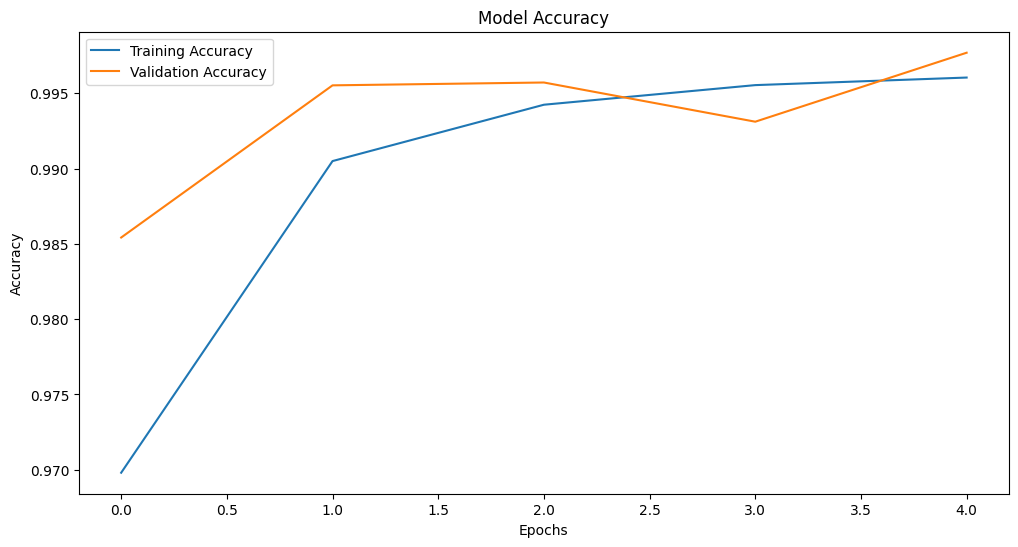


Classification Report:

              precision    recall  f1-score   support

           0     0.8990    0.9181    0.9085       281
           1     1.0000    1.0000    1.0000        33
           2     0.9999    0.9998    0.9998     24389
           3     0.9940    0.9987    0.9963     10723
           4     0.9988    0.9959    0.9973     13685
           5     0.9981    0.9970    0.9975     19626
           6     0.5000    1.0000    0.6667         3
           7     0.9000    0.9474    0.9231        38

    accuracy                         0.9977     68778
   macro avg     0.9112    0.9821    0.9362     68778
weighted avg     0.9977    0.9977    0.9977     68778



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN input
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], *input_shape)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], *input_shape)

# Define label encoder and fit with original labels
label_encoder = LabelEncoder()
label_encoder.fit(filtered_df['Label'])

# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_ros), y=y_train_ros)
class_weight_dict = dict(enumerate(class_weights))

# Define input shape based on the training data
input_shape = X_train_reshaped.shape[1:]  # Shape should exclude batch size

# Build the CNN model with increased dropout and reduced complexity
def create_model():
    model = models.Sequential()
    model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=512, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.6))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.6))
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

print("Training...")

# Define early stopping and reduce learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train_reshaped, y_train_ros,
    epochs=5,  # Increased number of epochs
    validation_data=(X_test_reshaped, y_test),
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot accuracies versus epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print classification report with metrics rounded to 4 decimal places
print("\nClassification Report:\n")
y_true = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Convert selected_labels to strings if necessary
selected_labels_str = [str(label) for label in label_encoder.classes_]

print(classification_report(y_true, y_pred_labels, target_names=selected_labels_str, digits=4))


Confusion Matrix:
 [[  258     0     0     1     1    21     0     0]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24384     4     0     1     0     0]
 [    2     0     0 10709     8     3     1     0]
 [    3     0     0    38 13629    13     2     0]
 [   22     0     3    22     8 19567     0     4]
 [    0     0     0     0     0     0     3     0]
 [    2     0     0     0     0     0     0    36]]


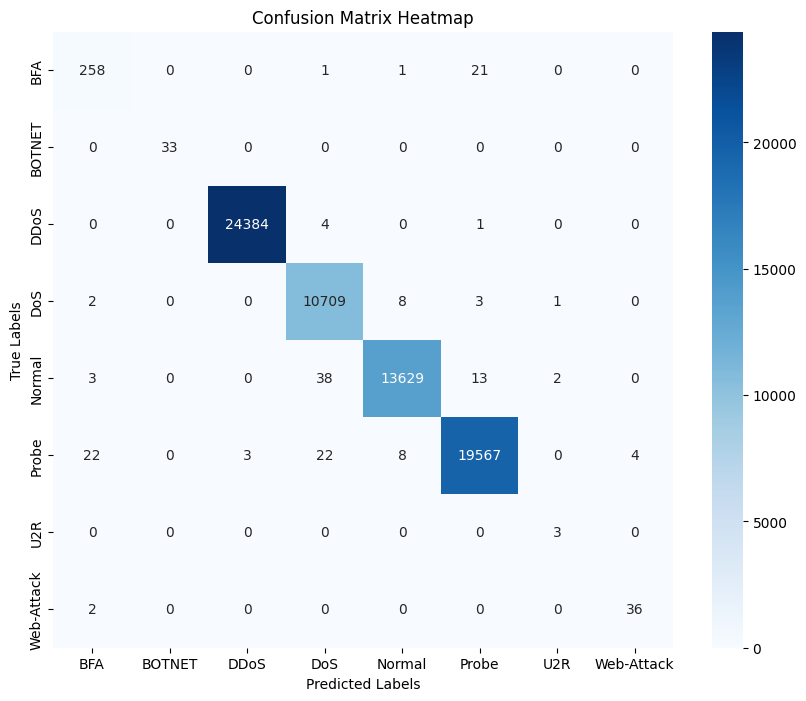

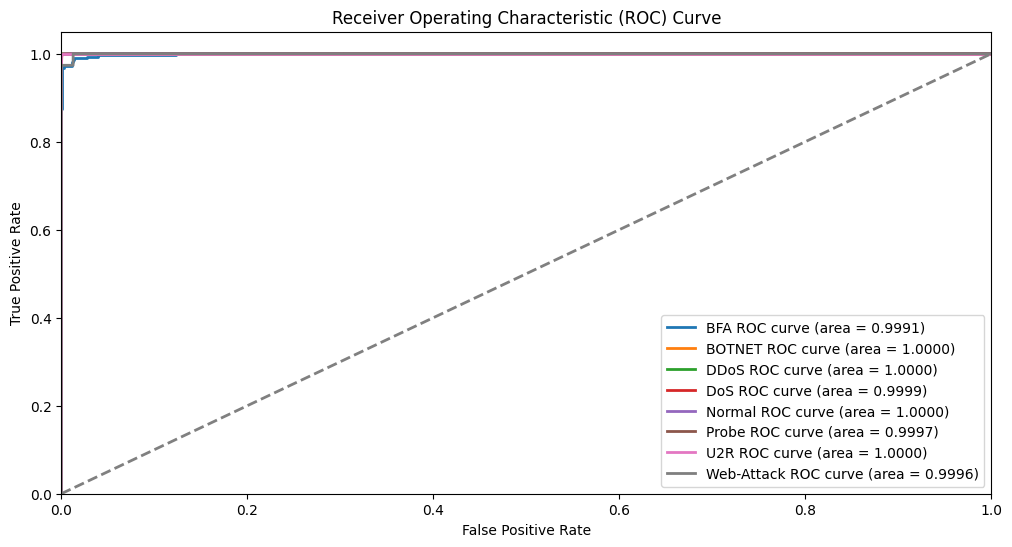

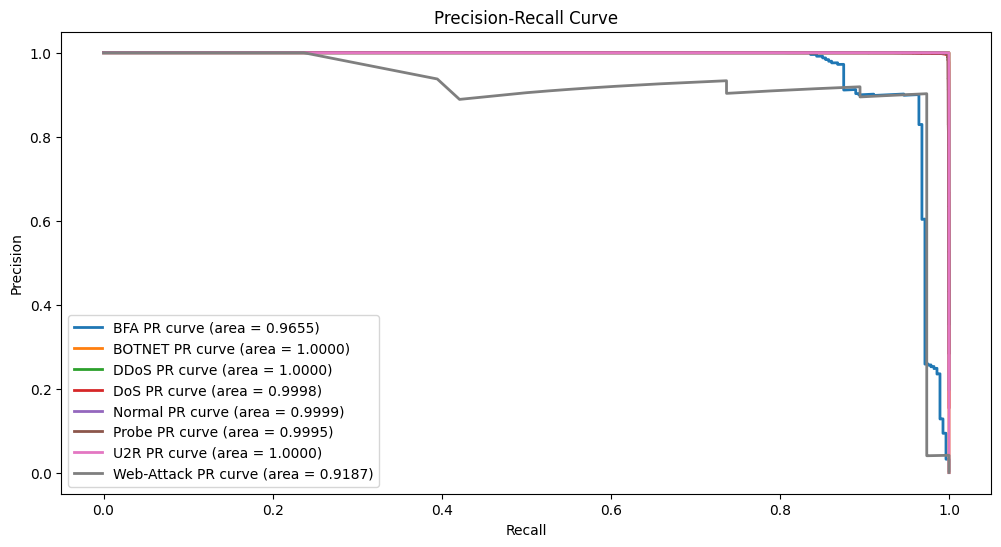

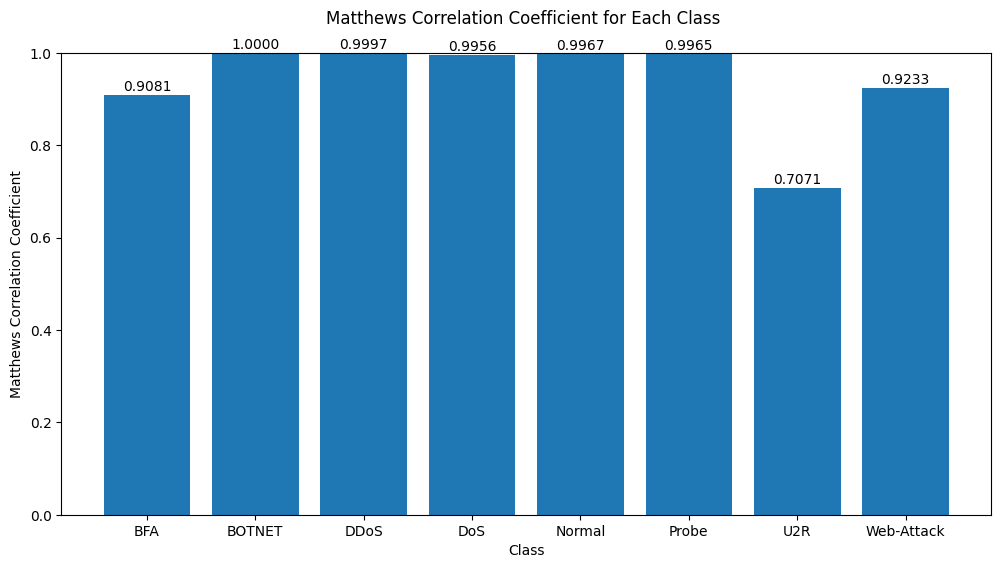


Classification Report:

              precision    recall  f1-score   support

         BFA     0.8990    0.9181    0.9085       281
      BOTNET     1.0000    1.0000    1.0000        33
        DDoS     0.9999    0.9998    0.9998     24389
         DoS     0.9940    0.9987    0.9963     10723
      Normal     0.9988    0.9959    0.9973     13685
       Probe     0.9981    0.9970    0.9975     19626
         U2R     0.5000    1.0000    0.6667         3
  Web-Attack     0.9000    0.9474    0.9231        38

    accuracy                         0.9977     68778
   macro avg     0.9112    0.9821    0.9362     68778
weighted avg     0.9977    0.9977    0.9977     68778



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, matthews_corrcoef, classification_report
from sklearn.preprocessing import label_binarize

# Class mapping
class_mapping = {
    0: 'BFA',
    1: 'BOTNET',
    2: 'DDoS',
    3: 'DoS',
    4: 'Normal',
    5: 'Probe',
    6: 'U2R',
    7: 'Web-Attack'
}

# Get the class names in order
class_names = [class_mapping[i] for i in range(len(class_mapping))]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
print('\n')
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} ROC curve (area = {roc_auc[i]:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print('\n')
# Plot Precision-Recall curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_names[i]} PR curve (area = {pr_auc[i]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
print('\n')
# Compute MCC for each class
mcc_values = [matthews_corrcoef(y_test_binarized[:, i], y_pred_binarized[:, i]) for i in range(n_classes)]

# Plot MCC values for each class
plt.figure(figsize=(12, 6))
plt.bar(range(n_classes), mcc_values, tick_label=class_names)
plt.title('Matthews Correlation Coefficient for Each Class \n')
plt.xlabel('Class')
plt.ylabel('Matthews Correlation Coefficient')
print('\n')
plt.ylim([0, 1])
for i, v in enumerate(mcc_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Print classification report with precision, recall, and F1-score up to 4 decimal places
print("\nClassification Report:\n")
y_true = [class_mapping[label] for label in y_test]
y_pred_labels = [class_mapping[label] for label in y_pred]

report = classification_report(y_true, y_pred_labels, target_names=class_names, digits=4)
print(report)


Training...
Epoch 1/5
3049/3049 [==============================] - 633s 206ms/step - loss: 0.4152 - accuracy: 0.9668 - val_loss: 0.2490 - val_accuracy: 0.9875 - lr: 1.0000e-04
Epoch 2/5
3049/3049 [==============================] - 558s 183ms/step - loss: 0.1904 - accuracy: 0.9924 - val_loss: 0.1480 - val_accuracy: 0.9922 - lr: 1.0000e-04
Epoch 3/5
3049/3049 [==============================] - 561s 184ms/step - loss: 0.1208 - accuracy: 0.9949 - val_loss: 0.0965 - val_accuracy: 0.9974 - lr: 1.0000e-04
Epoch 4/5
3049/3049 [==============================] - 545s 179ms/step - loss: 0.0857 - accuracy: 0.9961 - val_loss: 0.0855 - val_accuracy: 0.9923 - lr: 1.0000e-04
Epoch 5/5
2150/2150 [==============================] - 30s 14ms/step
Confusion Matrix:
 [[  274     0     0     1     1     5     0     0]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24387     1     1     0     0     0]
 [    0     0     0 10711     9     3     0     0]
 [    1     0     0     4 13670    10   

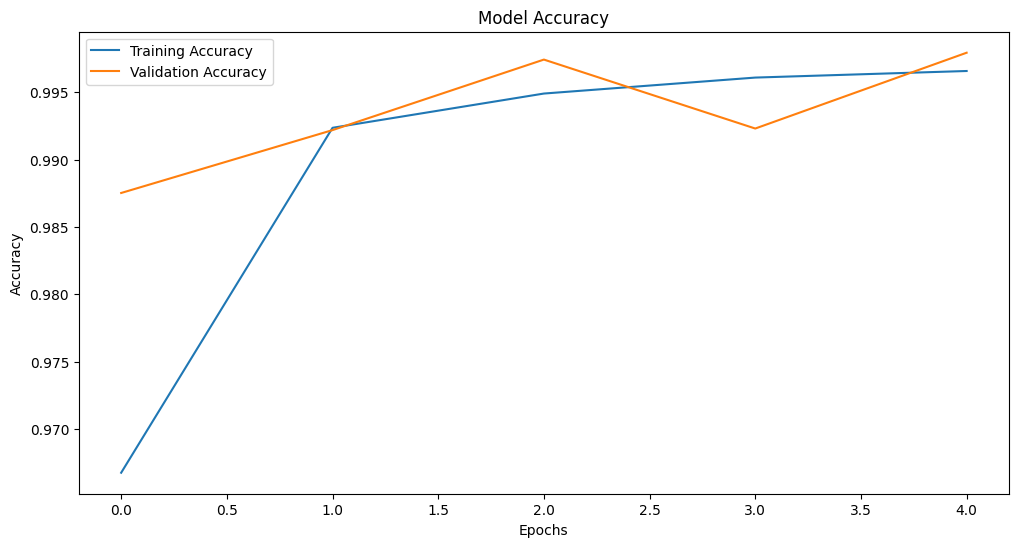


Classification Report:

              precision    recall  f1-score   support

           0     0.7762    0.9751    0.8644       281
           1     1.0000    1.0000    1.0000        33
           2     0.9999    0.9999    0.9999     24389
           3     0.9980    0.9989    0.9985     10723
           4     0.9988    0.9989    0.9988     13685
           5     0.9991    0.9948    0.9969     19626
           6     1.0000    1.0000    1.0000         3
           7     0.8974    0.9211    0.9091        38

    accuracy                         0.9979     68778
   macro avg     0.9587    0.9861    0.9709     68778
weighted avg     0.9982    0.9979    0.9980     68778



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN input
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], *input_shape)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], *input_shape)

# Define label encoder and fit with original labels
label_encoder = LabelEncoder()
label_encoder.fit(filtered_df['Label'])

# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_ros), y=y_train_ros)
class_weight_dict = dict(enumerate(class_weights))

# Define input shape based on the training data
input_shape = X_train_reshaped.shape[1:]  # Shape should exclude batch size

# Build a hybrid CNN-LSTM model
def create_hybrid_model():
    model = models.Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(layers.LSTM(128))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_hybrid_model()

print("Training...")

# Define early stopping and reduce learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train_reshaped, y_train_ros,
    epochs=5,
    validation_data=(X_test_reshaped, y_test),
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot accuracies versus epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print classification report with metrics rounded to 4 decimal places
print("\nClassification Report:\n")
y_true = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Convert selected_labels to strings if necessary
selected_labels_str = [str(label) for label in label_encoder.classes_]

print(classification_report(y_true, y_pred_labels, target_names=selected_labels_str, digits=4))


Confusion Matrix:
 [[  274     0     0     1     1     5     0     0]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24387     1     1     0     0     0]
 [    0     0     0 10711     9     3     0     0]
 [    1     0     0     4 13670    10     0     0]
 [   76     0     3    14     6 19523     0     4]
 [    0     0     0     0     0     0     3     0]
 [    2     0     0     1     0     0     0    35]]


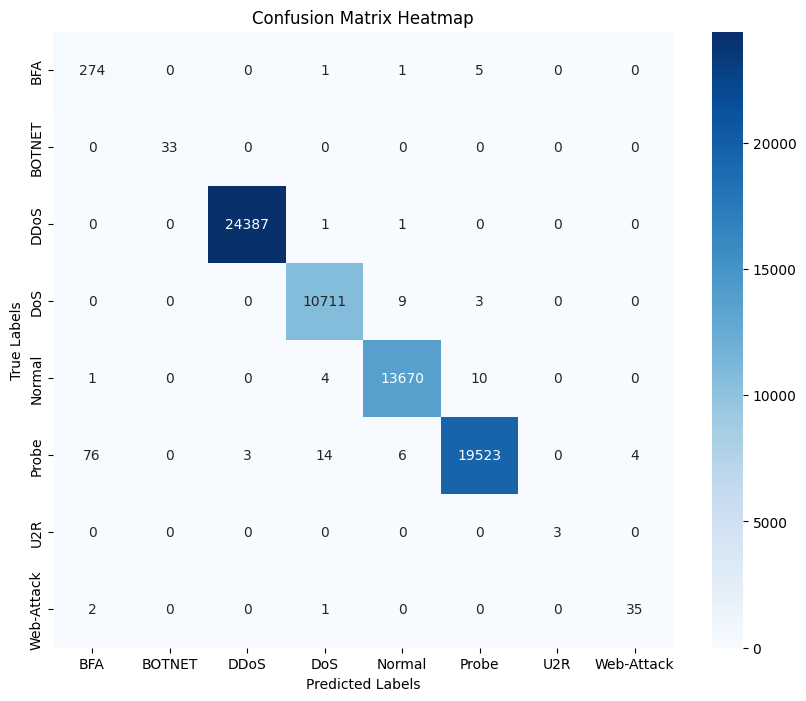

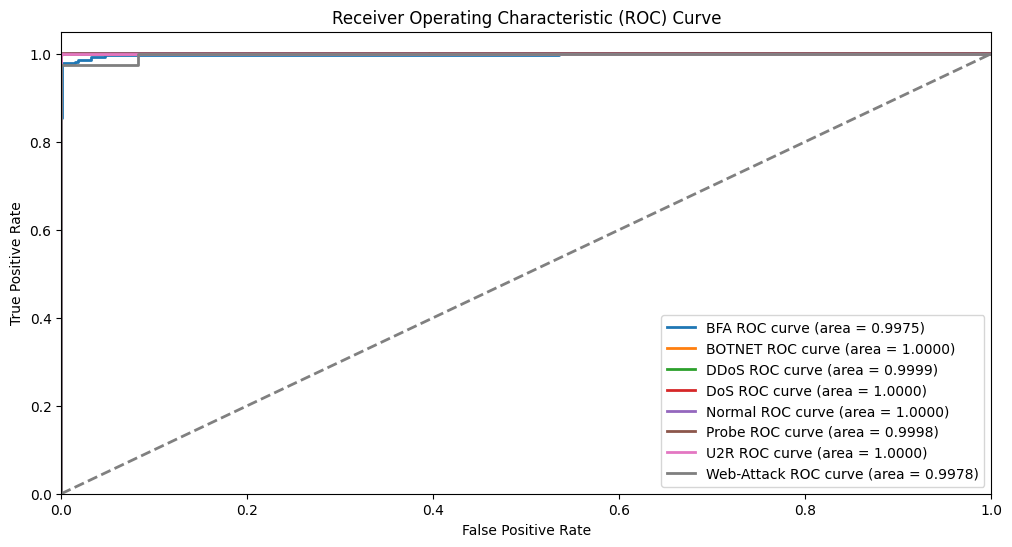

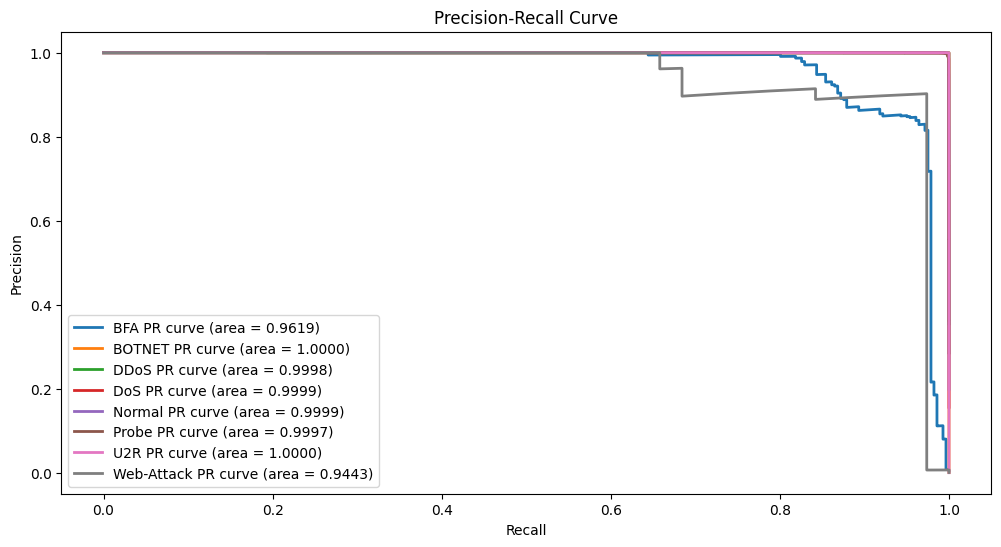

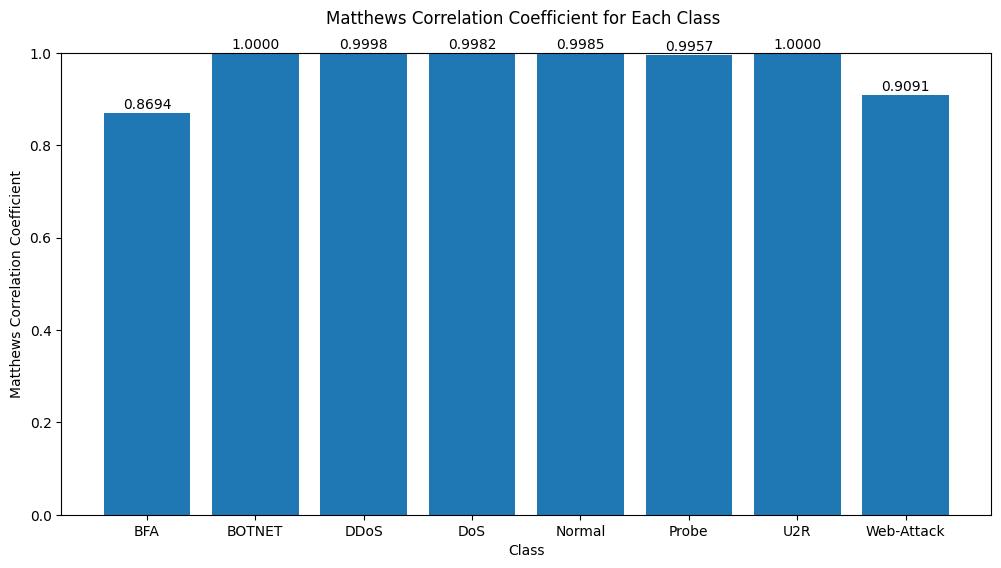


Classification Report:

              precision    recall  f1-score   support

         BFA     0.7762    0.9751    0.8644       281
      BOTNET     1.0000    1.0000    1.0000        33
        DDoS     0.9999    0.9999    0.9999     24389
         DoS     0.9980    0.9989    0.9985     10723
      Normal     0.9988    0.9989    0.9988     13685
       Probe     0.9991    0.9948    0.9969     19626
         U2R     1.0000    1.0000    1.0000         3
  Web-Attack     0.8974    0.9211    0.9091        38

    accuracy                         0.9979     68778
   macro avg     0.9587    0.9861    0.9709     68778
weighted avg     0.9982    0.9979    0.9980     68778



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, matthews_corrcoef, classification_report
from sklearn.preprocessing import label_binarize

# Class mapping
class_mapping = {
    0: 'BFA',
    1: 'BOTNET',
    2: 'DDoS',
    3: 'DoS',
    4: 'Normal',
    5: 'Probe',
    6: 'U2R',
    7: 'Web-Attack'
}

# Get the class names in order
class_names = [class_mapping[i] for i in range(len(class_mapping))]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
print('\n')
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} ROC curve (area = {roc_auc[i]:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print('\n')
# Plot Precision-Recall curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_names[i]} PR curve (area = {pr_auc[i]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
print('\n')
# Compute MCC for each class
mcc_values = [matthews_corrcoef(y_test_binarized[:, i], y_pred_binarized[:, i]) for i in range(n_classes)]

# Plot MCC values for each class
plt.figure(figsize=(12, 6))
plt.bar(range(n_classes), mcc_values, tick_label=class_names)
plt.title('Matthews Correlation Coefficient for Each Class \n')
plt.xlabel('Class')
plt.ylabel('Matthews Correlation Coefficient')
print('\n')
plt.ylim([0, 1])
for i, v in enumerate(mcc_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Print classification report with precision, recall, and F1-score up to 4 decimal places
print("\nClassification Report:\n")
y_true = [class_mapping[label] for label in y_test]
y_pred_labels = [class_mapping[label] for label in y_pred]

report = classification_report(y_true, y_pred_labels, target_names=class_names, digits=4)
print(report)


**CNN with LSTM**

Training...
Epoch 1/5
24389/24389 [==============================] - 1435s 59ms/step - loss: 0.1360 - accuracy: 0.9757 - val_loss: 0.0329 - val_accuracy: 0.9877 - lr: 1.0000e-04
Epoch 2/5
24389/24389 [==============================] - 1417s 58ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0214 - val_accuracy: 0.9923 - lr: 1.0000e-04
Epoch 3/5
24389/24389 [==============================] - 1399s 57ms/step - loss: 0.0187 - accuracy: 0.9946 - val_loss: 0.0139 - val_accuracy: 0.9977 - lr: 1.0000e-04
Epoch 4/5
24389/24389 [==============================] - 1411s 58ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.0154 - val_accuracy: 0.9970 - lr: 1.0000e-04
Epoch 5/5
2150/2150 [==============================] - 40s 18ms/step
Confusion Matrix:
 [[  273     0     0     1     1     6     0     0]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24387     0     0     2     0     0]
 [    0     0     0 10689    28     6     0     0]
 [    2     0     0     3 13676 

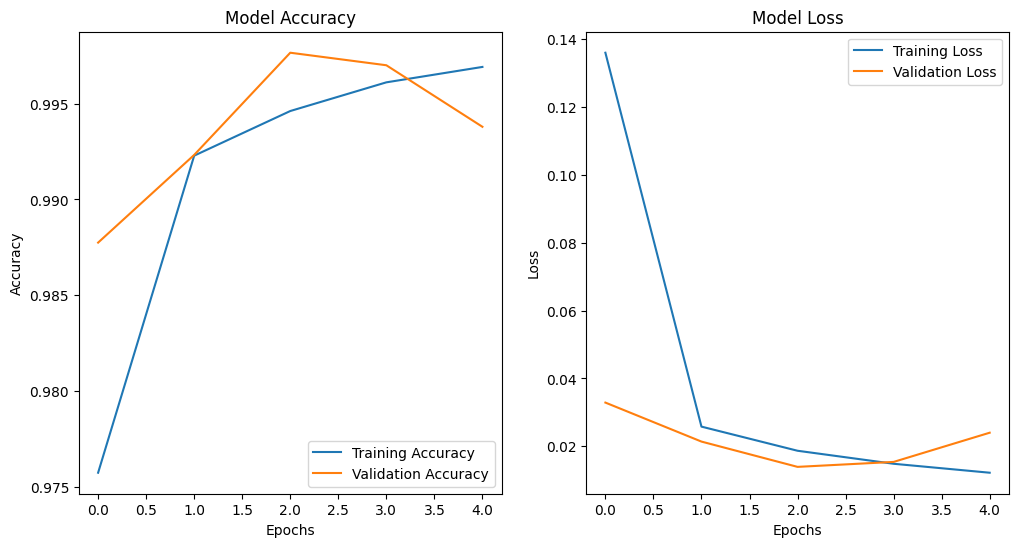


Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.97      0.60       281
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00     24389
           3       1.00      1.00      1.00     10723
           4       1.00      1.00      1.00     13685
           5       1.00      0.98      0.99     19626
           6       1.00      1.00      1.00         3
           7       0.90      0.97      0.94        38

    accuracy                           0.99     68778
   macro avg       0.92      0.99      0.94     68778
weighted avg       1.00      0.99      0.99     68778



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_ros, X_test, y_train_ros, y_test, filtered_df['Label'] are already defined.

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN input
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], *input_shape)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], *input_shape)

# Define label encoder and fit with original labels
label_encoder = LabelEncoder()
label_encoder.fit(filtered_df['Label'])

# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_ros), y=y_train_ros)
class_weight_dict = dict(enumerate(class_weights))

# Define input shape based on the training data
input_shape = X_train_reshaped.shape[1:]  # Shape should exclude batch size

# Build the hybrid CNN-LSTM model with reduced complexity
def create_model():
    model = models.Sequential()

    # CNN layers
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))

    # LSTM layers
    model.add(layers.LSTM(64, return_sequences=True))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128))
    model.add(layers.BatchNormalization())

    # Dense layers
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()

print("Training...")

# Define early stopping and reduce learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train_reshaped, y_train_ros,
    epochs=5,  # Reduced number of epochs
    validation_data=(X_test_reshaped, y_test),
    batch_size=32,  # Reduced batch size
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot accuracies and losses versus epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Print classification report
print("\nClassification Report:\n")
y_true = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Convert selected_labels to strings if necessary
selected_labels_str = [str(label) for label in label_encoder.classes_]

print(classification_report(y_true, y_pred_labels, target_names=selected_labels_str))
